In [223]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [232]:
df = pd.read_csv("train.csv")
df.drop(['Name','Ticket','PassengerId'], axis = 1, inplace = True)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


In [233]:
df['Sex'] = [1 if x == "male" else 2 for x in df['Sex']]
df['Cabin'] = [0 if pd.isnull(x) else 1 for x in df['Cabin']]
df['Embarked'] = [1 if x=="S" else 2 if x=="C" else 3 for x in df['Embarked']]
df['Age']/=10
df['Fare']/=10
df = df.dropna()
df.head(10)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,2.2,1,0,0.72500,0,1
1,1,1,2,3.8,1,0,7.12833,1,2
2,1,3,2,2.6,0,0,0.79250,0,1
3,1,1,2,3.5,1,0,5.31000,1,1
4,0,3,1,3.5,0,0,0.80500,0,1
6,0,1,1,5.4,0,0,5.18625,1,1
7,0,3,1,0.2,3,1,2.10750,0,1
8,1,3,2,2.7,0,2,1.11333,0,1
9,1,2,2,1.4,1,0,3.00708,0,2
10,1,3,2,0.4,1,1,1.67000,1,1


In [234]:
x = df.drop('Survived', axis = 1)
x['bias'] = np.ones(x.shape[0])
#x= x[0:5]
m,n = x.shape
y = df['Survived']
w = np.random.random(n)
itr = 350
x.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,bias
0,3,1,2.2,1,0,0.72500,0,1,1.0
1,1,2,3.8,1,0,7.12833,1,2,1.0
2,3,2,2.6,0,0,0.79250,0,1,1.0
3,1,2,3.5,1,0,5.31000,1,1,1.0
4,3,1,3.5,0,0,0.80500,0,1,1.0
6,1,1,5.4,0,0,5.18625,1,1,1.0
7,3,1,0.2,3,1,2.10750,0,1,1.0
8,3,2,2.7,0,2,1.11333,0,1,1.0
9,2,2,1.4,1,0,3.00708,0,2,1.0
10,3,2,0.4,1,1,1.67000,1,1,1.0


In [227]:
def learn(x,y,m,n,w):
    e = 0
    for i in range(0,m):
        y_calc = np.dot(x.iloc[i],w)
        if(y.iloc[i] == 0):
            if y_calc>=0:
                e+=1
                w-=x.iloc[i]
        else:
            if(y_calc<=0):
                e+=1
                w+=x.iloc[i]
    return e,w

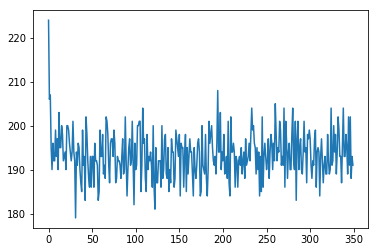

In [235]:
errors = []
for i in range(0,itr):
    e,w = learn(x,y,m,n,w)
    errors.append(e)
ws = w
plt.plot(np.arange(0,itr),errors)
plt.show()